# Word statistics on open source in environmental sustainability

## Ideas and ToDo
Compare with: https://blogs.reading.ac.uk/weather-and-climate-at-reading/2021/whats-that-data-why-and-how-the-geoscientific-community-is-forging-metadata-standards/
https://github.com/sadielbartholomew/cf-standard-names-linguistics
https://sadielbartholomew.github.io/cf-standard-names-linguistics/

In [1]:
!pip install nltk pandas yake multi_rake wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 5.2 MB/s eta 0:00:006.2 MB/s eta 0:00:01
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.0/357.0 KB 3.8 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 5.9 MB/s eta 0:00:00m eta 0:00:010:01:01


In [2]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

URL = "https://ost.ecosyste.ms/api/v1/projects?reviewed=true&per_page=3000"
FILE_TO_SAVE_AS = "projects.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file
    f.write(resp.content) # writing content to file

In [3]:
raw = pd.read_json(resp.content.decode())
print(raw.shape)
raw.head()

(2388, 30)


,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,events,keywords,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,monthly_downloads,readme,funding_links,readme_doi_urls,works,citation_counts,total_citations,keywords_from_contributors,project_url,html_url
0,142701,pyconturb,Constrained Stochastic Turbulence for Wind Ene...,https://gitlab.windenergy.dtu.dk/pyconturb/pyc...,2025-04-17 06:00:35.340000+00:00,None,None,[],None,None,None,[],None,0.0,2023-11-23 17:27:33.831000+00:00,2025-04-17 06:00:35.349000+00:00,None,None,Renewable Energy,Wind Energy,0,None,[],[],{},{},0,[],https://ost.ecosyste.ms/api/v1/projects/142701,https://ost.ecosyste.ms/projects/142701
1,142866,Open Hardware Observatory,Search engine and assessment platform for sust...,https://en.oho.wiki/wiki/Home,2025-04-17 05:00:21.429000+00:00,None,None,[],None,None,None,[],None,0.0,2023-11-23 17:27:47.668000+00:00,2025-04-17 05:00:21.431000+00:00,None,None,Sustainable Development,Knowledge Platforms,0,None,[],[],{},{},0,[],https://ost.ecosyste.ms/api/v1/projects/142866,https://ost.ecosyste.ms/projects/142866
2,142712,CAEBAT OAS,"A flexible, robust, and computationally scalab...",https://vibe.ornl.gov/#introduction,2025-04-17 06:00:39.491000+00:00,None,None,[],None,None,None,[],None,0.0,2023-11-23 17:27:34.475000+00:00,2025-04-17 06:00:39.494000+00:00,None,None,Energy Storage,Battery,0,None,[],[],{},{},0,[],https://ost.ecosyste.ms/api/v1/projects/142712,https://ost.ecosyste.ms/projects/142712
3,142713,open_BEA,Open Battery Models for Electrical Grid Applic...,https://gitlab.lrz.de/open-ees-ses/openbea,2025-04-17 06:00:40.636000+00:00,None,None,[],None,None,None,[],None,0.0,2023-11-23 17:27:34.502000+00:00,2025-04-17 06:00:40.659000+00:00,None,None,Energy Storage,Battery,0,None,[],[],{},{},0,[],https://ost.ecosyste.ms/api/v1/projects/142713,https://ost.ecosyste.ms/projects/142713
4,142714,lp_opt,Linear Programming Optimization Tool for Batte...,https://gitlab.lrz.de/open-ees-ses/lp_opt,2025-04-17 05:00:21.868000+00:00,None,None,[],None,None,None,[],None,0.0,2023-11-23 17:27:34.520000+00:00,2025-04-17 05:00:21.871000+00:00,None,None,Energy Storage,Battery,0,None,[],[],{},{},0,[],https://ost.ecosyste.ms/api/v1/projects/142714,https://ost.ecosyste.ms/projects/142714


In [4]:
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 50)

#https://www.nltk.org/
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stpwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/cy0/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/cy0/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/cy0/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/cy0/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
len(raw)

2388

# 1. Goal: Reduce the list of topics below into subtopics


In [6]:
raw['category'].value_counts()

category
Biosphere                  346
Consumption                299
Sustainable Development    292
Climate Change             269
Energy Systems             248
Natural Resources          196
Hydrosphere                187
Renewable Energy           141
Atmosphere                 141
Emissions                  104
Industrial Ecology          63
Cryosphere                  57
Energy Storage              45
Name: count, dtype: int64

In [7]:
raw['sub_category'].value_counts()

sub_category
Education                                         100
Energy System Modeling Frameworks                  87
Water Supply and Quality                           87
Mobility and Transportation                        81
Buildings and Heating                              76
Agriculture and Nutrition                          75
Freshwater and Hydrology                           73
Soil and Land                                      71
Climate Data Processing and Analysis               68
Photovoltaics and Solar Energy                     68
Meteorological Observation and Forecast            64
Computation and Communication                      62
Marine Life and Fishery                            60
Earth and Climate Modeling                         59
Emission Observation and Modeling                  57
Natural Hazard and Storm                           52
Climate Data Access and Visualization              48
Data Catalogs and Interfaces                       45
Ocean and Hydro

In [8]:
df = raw[['name','description','category','sub_category','owner','readme']]
df.head()

,name,description,category,sub_category,owner,readme
0,pyconturb,Constrained Stochastic Turbulence for Wind Ene...,Renewable Energy,Wind Energy,None,None
1,Open Hardware Observatory,Search engine and assessment platform for sust...,Sustainable Development,Knowledge Platforms,None,None
2,CAEBAT OAS,"A flexible, robust, and computationally scalab...",Energy Storage,Battery,None,None
3,open_BEA,Open Battery Models for Electrical Grid Applic...,Energy Storage,Battery,None,None
4,lp_opt,Linear Programming Optimization Tool for Batte...,Energy Storage,Battery,None,None


# 2. Sample Row

In [9]:
import re
import yake

In [10]:
# Removing words
words_black_list = ['python','pvlib','projects','affiliated','http','readthedocs','benchmarks','license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','google','documentation','please']

## Yake for keyword Extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

## Rake for keyword Extracion

In [11]:
from multi_rake import Rake

## KeyBERT for keyword extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

In [12]:
#from keybert import KeyBERT

In [13]:
#kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

# 3. Cleaning Full Dataset

In [14]:
# Fill null values with 'None'. This will allow us to concatenate the relevant text columns
df = df.fillna('None')

In [15]:
# Combine text columns
combined = df['description']

In [16]:
df['combined'] = combined
df.head()

,name,description,category,sub_category,owner,readme,combined
0,pyconturb,Constrained Stochastic Turbulence for Wind Ene...,Renewable Energy,Wind Energy,None,None,Constrained Stochastic Turbulence for Wind Ene...
1,Open Hardware Observatory,Search engine and assessment platform for sust...,Sustainable Development,Knowledge Platforms,None,None,Search engine and assessment platform for sust...
2,CAEBAT OAS,"A flexible, robust, and computationally scalab...",Energy Storage,Battery,None,None,"A flexible, robust, and computationally scalab..."
3,open_BEA,Open Battery Models for Electrical Grid Applic...,Energy Storage,Battery,None,None,Open Battery Models for Electrical Grid Applic...
4,lp_opt,Linear Programming Optimization Tool for Batte...,Energy Storage,Battery,None,None,Linear Programming Optimization Tool for Batte...


In [17]:
# Words to remove from column. We will keep adding to this list the more words we find that are irrelavent
words_black_list_small = ['python','projects','affiliated','http','readthedocs','benchmarks',
                    'license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','users','using'
                    'google','documentation','please','github','data','model','install','code',
                    'package','badge','project']

In [18]:
# More words to remove
words_black_list_large = ['python','tool','based','pvlib','projects','affiliated','http','readthedocs','benchmarks','aims','high','series','functions','large','calculate','applications','flow','easy','contains','state','collection','real','flexsible','program','implementation','evaluate','track','engineering',
                    'license','matlab','user','guide','html','https','open','source','journal','various','written','toolbox','working','design','related','level','deep','standard','within','applications','methods','toolkits','multi','network','coupled','platform','application','developed','possible',
                    'latest','release','build','publications','conda','installed','users','using','julia','different','toolkit','toolkit','provide','focus','smart','simple','enables','sources','client','advanced','digital','across','suite','domain','estimate','evaluation','measurements','statistical',
                    'google','documentation','please','github','data','model','install','code','numerical','simulation','algorithms','driven','interactive','helps', 'package','resolution','visualization','images','explore','develop','analysis','distributed','calculations','global','control','accessible',
                    'package','badge','project','version','file','view','system','master','used','also','providing','enable','multiple','point','image','process','including','components','computer','easily','built','range','line','calculations','term','uses','faciliate','online','study','evaluate',
                    'repository','example','docs','files','information','models','software','available','work','making','visualize','format','load','usage','module','apis','automated','temporal','curated','variable','best','variables','websites','sets','near','worldwide','automatic','problems','custom',
                    'zenodo','command','modis','pull','request','pctl','theoj','brodiepearson','blob','getting','order','fast','daily','makes','domaine','around','processes','associated','long','type','clean','optimal','many','awesome','extract','three','variety','useful','inventory','allowing',
                    'started','machine','learning','make','sure','pypi','ipcc','main','scholor','colorado','codecov','individual','researchers','historical','metadata','supporting','finite','analyze','databases','chemical','initiative','technologies','collect','hourly','given','solver','space',
                    'none','jupyter','notebook','united','states','docker','anaconda','forge','datasets','false','would','reference','tracking','identify','general','techniques','scripts','world','libraries','estimating','neutral','response','algorithm','ground','retrieving','retrieve','quantitative',
                    'like','gustavoirgang','google','collab','sciencedirect','yaml','downloads','actions','workflows', 'understanding','international','compute','gridded','studies','single','calculates','exchange','potential','robust','dimensional','reporting','development','simulations','flexsible',
                    'media','icon','joss','papers','legend','description','jobs','download','input','output','latitude','longitude','analyse','measurement','directly','official','sheet','classifications','find','features','computational','operations','grids','includes','text','standardized','dedicated','easier','purpose',
                    'unit','tests','cran','nbsp','colab','check','plot','ncss','contributing','installation', 'instructions','fortran','complex','simulating','component','access','bottom','flexible','search','agent','results','needed','creating','friendly','basic','linear','assess','wrapper','defined','wide','method',
                    'wiki','wikipedia','feel','free','name','list','issues','start','examples','index','dataset','branch','create','high','performance','management','scale','website','codes','programs','downnloading','utility','imagery','events','websites','share','solutions','published',
                    'enabling','specification','semantic','inputs','query','vertical','estimates','freely','several','object','specific','parameters','discover','accelerate','calculating','functionality','cover','testing','operation','reinforcement','form','perform',
                    'better','towards','layer','evaluating','speed','comprehensive','cells','energyplus','derived','interactions','layers','emis','emerging','apps','hardware','past','read','android','utilities','nrel','better','repositories','simulate','oriented','european','tastes',
                    'availability','part','language','extent','europe','german','germany','quickly','approach','total','programming','short','visualise','produced','intended','quantifying','availability','plugin',
                    'server','noaa','existing','volume','primary','canada','post','core','carlo','platforms','gtfs','visualizations','chain','independent','benchmark','modules','change','changes',
                    'probabilistic','criteria','benchmark','scaleable','scales','mission','empirical','inventories','parallel','consistent','organization','countries','collaboration','agency','devices','sensor','sensors','goals','neutral','area',
                    'administration','meant','toolset','mixed','store','attrributes','unidata','improve','netcdf','supports','complete','levels','promote','levels','complete','collections','nasa','summary','conditions','effects',
                    'options','usgs','australian','commercial','monte','capable','neutral','save','generate','manage','factors','modelica','rapid','boundary','relevant','simulates','powerful','stakeholders','dynamics',
                    'containing','aware','operators','reading','notebooks','calculator','visualizing','statistics','direction','ensemble','automate','edge','xarray','integrating','along',
                    'host','show','document','compute','handle','converter','sample','collect','explore','flow','solve',
                    'explore','accurate','combine','signal','best','portfolio','removel','interact','extract','flow','interest','chemistry','detect','value','size','conduct','coordinate','class','obtain','attribute','group','trend','document','company','mean','sample','index',
                    'mesh','cross','loading','survay','neutral','centre','parameter','necessary','integration','years','maintained','conventional','active','hyprid','reliable','ability','training','representation','ready','super',
                    'routing','converts','benchmarking','specified','modern','offers','downloading','detect','apply','role','commonly','specifically','generalized','enhanced','routines','panel',
                    'external','generated','spred','generic','organization','elevation','stack','equivalent','lagrangian','generalized','generalized','report','things','organizations','java','display',
                    'next','analyzing','structured','practices','combines','widely','structure','qgis','operational','assessing','generates','characteristics','institute','estimation','determine','practitioners','benefit','particle','scale','technical','setup',
                    'modeling','national','quality','modelling','service','modular','neutral','small','australia','cell','british','columbia','generating','analyses','sharing','notebook','experiments','portal','types','quantify','artificial','focused','protocol','highly','equations','first','tasks','arduino','suitable','automation','compare','comparison',
                    'library','following','test','running','import','database','access','packages','directory','need','tools','simulation','time','framework','systems','designed','community','interface','optimization','allows','support','grid','research','processing','help','provides']

In [19]:
len(words_black_list_large)

693

In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()


def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    return lemmas

In [21]:
# Create new column called "cleaned_text" and apply different cleaning methods
df['cleaned_text'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_large)) # Remove words from blacklist
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords



In [22]:
df['cleaned_text']

0           constrained stochastic turbulence wind energy
1                           engine assessment sustainable
2       computationally scalable architecture integrat...
3                                      battery electrical
4                                  battery energy storage
                              ...                        
2383    tabular icebergs submerged ocean known kinemat...
2384            structurally guided sampling lidar forest
2385    clivar enso metrics proposes metric addressing...
2386                              gathering environmental
2387    impacts changing climate distribution marine l...
Name: cleaned_text, Length: 2388, dtype: object

# 4. Unique Words



In [29]:
from collections import Counter
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df['cleaned_text']]

# lemmatize
tokenized_data = [lemmatize_tokens(tokens) for tokens in tokenized_data]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

[nltk_data] Downloading package punkt_tab to /home/cy0/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/cy0/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [30]:
# print the top 30 most common tokens
word_freq = combined_counts.most_common(300)
word_freq

[('energy', 352),
 ('climate', 276),
 ('water', 149),
 ('power', 112),
 ('environmental', 106),
 ('weather', 100),
 ('carbon', 100),
 ('earth', 96),
 ('emission', 88),
 ('ocean', 82),
 ('building', 79),
 ('assessment', 71),
 ('science', 71),
 ('impact', 71),
 ('wind', 69),
 ('plant', 68),
 ('forest', 67),
 ('atmospheric', 64),
 ('soil', 62),
 ('land', 59),
 ('resource', 56),
 ('electricity', 55),
 ('surface', 53),
 ('solar', 53),
 ('specie', 53),
 ('environment', 52),
 ('ecosystem', 48),
 ('satellite', 46),
 ('monitoring', 45),
 ('cloud', 45),
 ('battery', 43),
 ('integrate', 43),
 ('consumption', 43),
 ('tree', 41),
 ('biodiversity', 40),
 ('marine', 39),
 ('product', 39),
 ('forecast', 38),
 ('service', 37),
 ('transport', 37),
 ('distribution', 36),
 ('cost', 35),
 ('generation', 35),
 ('meteorological', 34),
 ('life', 34),
 ('scenario', 34),
 ('cycle', 34),
 ('atmosphere', 33),
 ('hydrological', 33),
 ('sustainable', 32),
 ('prediction', 32),
 ('measure', 32),
 ('remote', 32),
 ('e

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

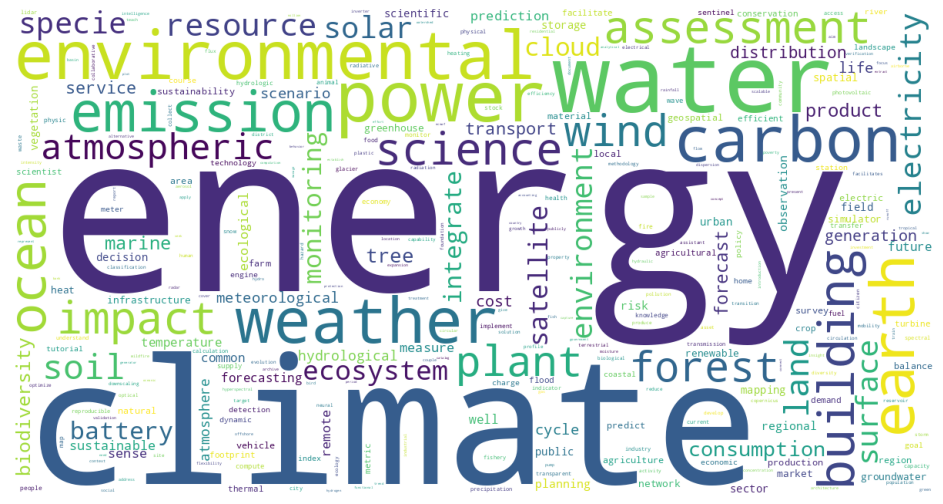

In [48]:
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", max_words=300,width=1200,height=630,relative_scaling=1.0)

wc.generate_from_frequencies(dict(word_freq))
wc.to_file('N.png')
my_dpi=96
plt.figure(figsize=(1200/my_dpi, 630/my_dpi), dpi=my_dpi)
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.savefig('image.jpg')
plt.show()



# 5. Unique Bigrams and Trigrams

In [ ]:
df['cleaned_text'].str.split()

In [ ]:
df['cleaned_text_bigrams'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_small)) # Remove words from blacklist
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords

In [ ]:
# Create list of words in the order in which they orignally appear
words = list(df['cleaned_text_bigrams'].str.split().apply(pd.Series).stack().reset_index(drop = True))

In [ ]:
# Most frequent bigrams
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts()).to_frame()

In [ ]:
type(bigrams)

In [ ]:
bigrams.head(300)

In [ ]:
# This are the bigrams manually filtered to match to the OpenSustain.tech database
bigrams_ost = ["climate change","energy systems","power system","earth system","energy system","energy consumption","power systems","remote sensing","renewable energy","water quality","life cycle","radiative transfer","weather climate","integrated assessment","wind energy","earth science","carbon footprint","surface water","sustainable development","species distriibution","power plants","wind turbine", "electric vehicle","wind farm","carbon emiśsions","greenhouse emissions","greenhouse gases","electricity market","land surface","numerical weather","wind turbine", "energy storage","development goals","solar cells", "soil water", "energy resources", "solar energy","energy managment", "carbon intensity", "water balance", "soil moisture", "climate science", "environmental impacts", "climate models", "carbon cycle", "offshore wind", "energy sector", "energy information", "distributed energy", "impact climate", "weather prediction", "urban energy", "power consumption", "citizen science", "decision making", "atmospheric science", "water resources", "land cover", "circular economy", "biodivercity information", "global climate", "forest management", "hydrological models", "large eddy", "energy market", "forest carbon", "atmospheric oceanic", "solar radiation", "stock assessment","general circulation", "battery models", "weather forecasts", "climate scenarios", "environmental economic", "climate policy", "climate analysis", "climate carbon", "electricity generation", "energy policy", "power grid", "electricity system", "fisheries stock", "global weather", "cloud microphysics","storage systems","wind speed", "wind farms","public transport","solar thermal", "statisical downscaling", "future energy", "energy modeling", "energy generation", "environment climate","tree crown","climate downscaling","solar power","wildland fire","climate sciences","fossil fuel","global scale","impact assessment","energy resource","carbon dioxide","carbon nitrogen","ocean state","emissions energy","soil properties","shallow water","smart grid","water treatment","future climate","climate impacts","level rise","global soil","niche models","land use","costal ocean","heating cooling", "ecological niche", "energy usage", "weather radar","water flow","wave energy","heat pump","district heating","flood inundation","protected areas","smart meter","demand flexibility"," groundwater surface","bottom trawl","tropical cyclone","water management","water carbon","organic carbon","atmospheric composition","marine debris","fire spread","electrial grid","social environmental","atmospheric models","global change","plastic pollution","change analysis"]


In [ ]:
bigrams_ost

In [ ]:
# Most frequent trigrams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:100]

In [ ]:
!wget https://raw.githubusercontent.com/sadielbartholomew/cf-standard-names-linguistics/master/data/all_cf_standard_names_for_table_v83_at_30_11_23.txt

In [ ]:
cf_file = open("all_cf_standard_names_for_table_v83_at_30_11_23.txt", "r")
cf_meta_data = cf_file.read().split("\n")
df_cf_meta = pd.DataFrame(cf_meta_data,columns =['description'])

In [ ]:
df_cf_meta

In [ ]:
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_large)) # Remove words from blacklist
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords

In [ ]:
# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df_cf_meta['description']]

# lemmatize
tokenized_data = [lemmatize_tokens(tokens) for tokens in tokenized_data]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

In [ ]:
# print the top 30 most common tokens
word_freq = combined_counts.most_common(300)
word_freq


In [ ]:
words_cf_meta = list(df_cf_meta['description'].str.split().apply(pd.Series).stack().reset_index(drop = True))

In [ ]:
# Most frequent bigrams
bigrams = (pd.Series(nltk.ngrams(words_cf_meta, 2)).value_counts()).to_frame()

In [ ]:
bigrams.head(300)